Предположим, мы написали программу. Она даже запустилась и вроде даже что-то сделала. Но в один прекрасный момент всё вылетело, а в терминале вылезло непонятное сообщение:

In [1]:
Traceback (most recent call last):
File "<stdin>", line 1, in <module>
ValueError: invalid literal for int() with base 10: "odin"

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1087127686.py, line 1)

Эта ошибка относится к типу **исключительных ситуаций**. Исключительные ситуации порой возникают в случаях, когда вы написали код правильно, он запустился и отработал своё, а запустив код на следующий день, вы видите ошибку.

**Исключения** — это такие ошибки, которые возникают не во время компиляции программы, а в процессе её исполнения, в случаях, если что-то идёт не так.

Ошибки бывают **двух видов**:

- отлавливаемые — все, что наследуются от класса *Exception*;
- не отлавливаемые — *SystemExit*, *KeyboardInterrupt* и т. д.

Давайте же посмотрим на пример кода, который вызывает исключение.

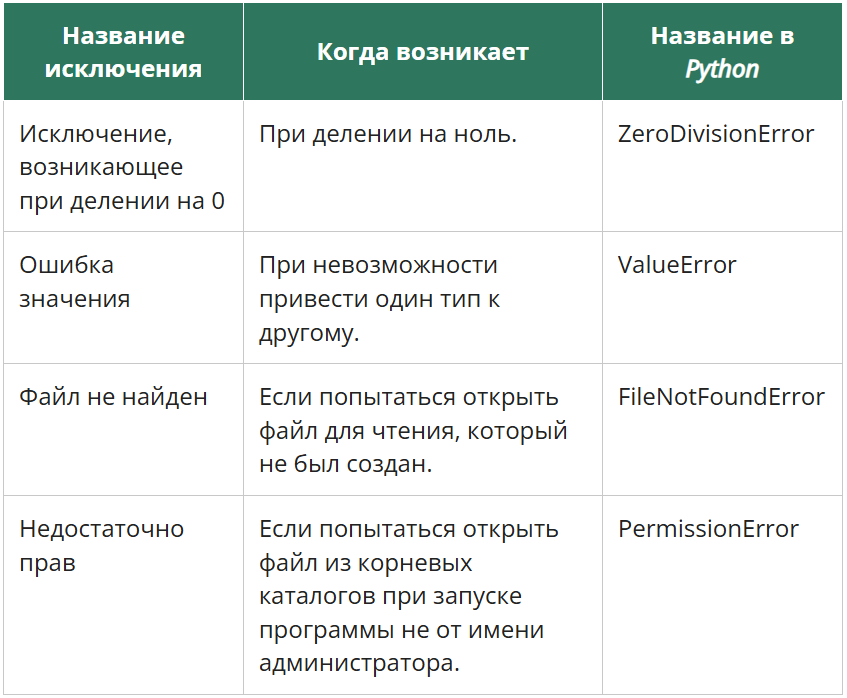

Это лишь несколько из них. Список всех исключений доступен в документации. Можете ознакомиться с ним, чтобы быть в курсе, какие ошибки могут возникнуть в простых программах.

https://docs.python.org/3/library/exceptions.html

In [2]:
print('Перед исключением')
c = 1/0
print('После исключения')

Перед исключением


ZeroDivisionError: division by zero

Строка «После исключения» не будет выведена на экран: как только интерпретатор дойдёт до строчки c = 1 / 0, он экстренно завершит работу и выведет нам сообщение об ошибке деления на ноль.

В этом примере мы чётко видим, что может возникнуть ошибка. Но в большинстве случаев это бывает не столь очевидно. Поэтому давайте слегка поменяем наш код:

In [3]:
print('Перед исключением')
# Теперь пользователь сам вводит числа для деления
a = int(input('a: '))
b = int(input('b: '))
c = a/b # Здесь может возникнуть исключение деления на ноль
print(c) # Печатаем c=a/b если все хорошо
print('После исключения')

Перед исключением
0.8888888888888888
После исключения


После выполнения этого кода у пользователя может возникнуть такая же ошибка, если он введёт b = 0.

?
Как же сделать так, чтобы программа не вылетала при ошибке и продолжала свою работу? 

Очень просто! Для этого и нужна конструкция `try-except`.

Давайте посмотрим на следующий код:

In [6]:
try: # Добавляем конструкцию try-except для отлова ошибки
    print('Перед исключением')
    # Теперь пользователь сам вводит числа для деления
    a = int(input('a: '))
    b = int(input('b: '))
    c = a/b # Здесь модет возникнуть исключение деления на ноль
    print(c) # Печатаем с = a/b если все хорошо
except ZeroDivisionError as e: # Добавляем тип именно той ошибки, которую хотим отловить
    print(e) # Выводим информацию об ошибке
    print('После исключения')

print('После После исключения')

Перед исключением
division by zero
После исключения
После После исключения


В данном случае тоже может возникнуть ошибка деления на ноль, если пользователь введёт `b = 0`. Поэтому мы отлавливаем ошибку `ZeroDivisionError`. В блоке `try` помещается **«опасный» кусок** кода, который может вызывать исключения, а в блоке `except` указывается **класс ошибки**, которую мы хотим отловить, а затем помещается **код, который нужно выполнить** в случае возникновении ошибки. 

После возникновении ошибки код в блоке `try` прервётся, перейдёт в блок `except`, а затем продолжит выполняться дальше — **программа не вылетает**, как это было без обработчика исключений. В этом и есть главная суть конструкции `try-except`.

Это ещё не всё! Есть также блоки `finally` и `else`. Код в блоке `else` выполнялся **после завершения цикла**. С `try-except` есть нечто похожее. Посмотрите на пример кода ниже.

In [7]:
try:
    *ваш код*
except Ошибка:
    *Код отлова*
else:
    *Код, который выполнится если всё хорошо прошло в блоке try*
finally:
    *Код, который выполнится по любому*

SyntaxError: invalid syntax (828828766.py, line 2)

Важно! Обратите внимание на отступы — код внутри конструкции сдвинут на второй уровень вложенности.

Рассмотрим применение этих блоков на примере:

In [9]:
try:
    print('Перед исключением')
    a = int(input('a: '))
    b = int(input('b: '))
    c = a/b
    print(c)
except ZeroDivisionError as e:
    print('После исключения')
else: # Код в блоке else выполняется только в том случае, если код в 
    # блоке try выполнился успешно (т.е. не вылетело никакого исключения)
    print('Всё ништяк')
finally: # Код в блоке finally выполнится в любом случае, при выходе 
    # из try-except
    print('Finally на месте')

print('После После исключения')

Перед исключением
5.0
Всё ништяк
Finally на месте
После После исключения


Здесь результат работы программы будет зависеть от ввода пользователя. Если пользователь введёт всё **правильно**, то он должен увидеть следующее:

In [10]:
#Перед исключением
#*результат деления a/b*
#Всё ништяк
#Finally на месте
#После После исключения

Если же возникнет ошибка, то пользователь увидит следующее:

In [11]:
#Перед исключением
#После исключения
#Finally на месте
#После После исключения

Код в блоке `else` не выполнится, поскольку было **исключение**, а код в блоке `finally` выполняется в обоих случаях.

Конечно, мы можем вызывать ошибки самостоятельно с помощью конструкции `raise`. Используется это, как правило, для отладки кода и остановки программы в критических ситуациях.

In [12]:
# Например
age = int(input('Сколько тебе лет?'))

if age >100 or age<=0:
    raise ValueError('Тебе не может быть столько лет')

print(f'Тебе {age} лет!') # Возраст выводится только если 
# пользователь ввел правильный возраст

ValueError: Тебе не может быть столько лет

Здесь ошибка `ValueError` возникнет, если пользователь ввёл неправильный возраст, и остановит работу программы, выдав в консоль:

In [13]:
raise ValueError("Тебе не может быть столько лет")
Traceback (most recent call last):
File "<stdin>", line 1, in <module>
ValueError: Тебе не может быть столько лет

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3622278381.py, line 2)

В консоль выводится именно то сообщение, **которое вы передадите в аргумент конструктора класса исключения**. Если не хотите никаких сообщений, то просто оставьте скобки пустыми. 

Стоит отметить, что отлавливать вызываемые с помощью `raise` ошибки тоже можно.

In [15]:
# Например
try:
    age = int(input('Сколько тебе лет?'))

    if age > 100 or age <= 0:
        raise ValueError('Тебе не может быть столько лет')

    # Возраст выводится только если пользователь ввел правильный возраст
    print(f'Тебе {age} лет!')
except ValueError:
    print('Неправильный возраст')

Неправильный возраст


Давайте кратко подведём **итоги**:

1. **Исключения** — это ошибки, которые выбрасываются при неправильной работе программы, и останавливают её выполнение, если они не обработаны.
Конструкция `try-except` выглядит следующим образом и служит для обработки исключений:


In [16]:
try:
    *код, который может вызвать ту или иную ошибку*
except *ошибка*:
    *код, который выполнится в случае возникновения ошибки*
else:
    *код, который выполнится только в случае если в try ничего не сломалось*
finally:
    *код, который выполнится по любому*


SyntaxError: invalid syntax (3408806116.py, line 2)

Выбрасывать ошибки можно и по своему желанию с помощью конструкции `raise` *Тип ошибки* (сообщение, которое нужно вывести в консоль).

**Задание 8.7**


Создать скрипт, который будет в `input()` принимать **строки**, и их необходимо будет конвертировать **в числа**, добавить `try-except` на то, чтобы строки могли быть сконвертированы в числа.

В случае **удачного** выполнения скрипта написать: `«Вы ввели <введённое число>»`.

**В конце** скрипта обязательно написать: `«Выход из программы»`.

**ПРИМЕЧАНИЕ**: Для отлова ошибок используйте `try-except`, а также блоки `finally` и `else`.

In [19]:
try:
    a = int(input('Введите число: '))
except ValueError as e:
    print('Вы ввели неправильное число')
else:
    print(f'Вы ввели {a}')
finally:
    print('Выход из программы')

Вы ввели 21
Выход из программы


## <center> 9. Тонкости обработки исключений. Собственные классы исключений

In [2]:
BaseException
 +-- SystemExit
 +-- KeyboardInterrupt
 +-- GeneratorExit
 +-- Exception
  	+-- StopIteration
  	+-- StopAsyncIteration
  	+-- ArithmeticError
  	|	FloatingPointError
  	|	OverflowError
  	|	ZeroDivisionError
  	+-- AssertionError
  	+-- AttributeError
  	+-- BufferError
  	+-- EOFError
  	+-- ImportError
  	|	+-- ModuleNotFoundError
  	+-- LookupError
  	|	+-- IndexError
  	|	+-- KeyError
  	+-- MemoryError
  	+-- NameError
  	|	+-- UnboundLocalError
  	+-- OSError
  	|	+-- BlockingIOError
  	|	+-- ChildProcessError
  	|	+-- ConnectionError
  	|	|	+-- BrokenPipeError
  	|	|	+-- ConnectionAbortedError
  	|	|	+-- ConnectionRefusedError
  	|	|	+-- ConnectionResetError
  	|	+-- FileExistsError
  	|	+-- FileNotFoundError
  	|	+-- InterruptedError
  	|	+-- IsADirectoryError
  	|	+-- NotADirectoryError
  	|	+-- PermissionError
  	|	+-- ProcessLookupError
  	|	+-- TimeoutError
  	+-- ReferenceError
  	+-- RuntimeError
  	|	+-- NotImplementedError
  	|	+-- RecursionError
  	+-- SyntaxError
  	|	+-- IndentationError
  	|     	+-- TabError
  	+-- SystemError
  	+-- TypeError
  	+-- ValueError
  	|	+-- UnicodeError
  	|     	+-- UnicodeDecodeError
  	|     	+-- UnicodeEncodeError
  	|     	+-- UnicodeTranslateError
  	+-- Warning
       	+-- DeprecationWarning
       	+-- PendingDeprecationWarning
       	+-- RuntimeWarning
       	+-- SyntaxWarning
       	+-- UserWarning
       	+-- FutureWarning
       	+-- ImportWarning
       	+-- UnicodeWarning
       	+-- BytesWarning
       	+-- ResourceWarning

TabError: inconsistent use of tabs and spaces in indentation (<string>, line 55)

Эта система - **дерево стандартных отклонений**

Исключения представлены определёнными классами, которые в той или иной степени наследуются от `BaseException` (базовое исключение).

Классы `+-- SystemExit` `+-- KeyboardInterrupt` `+-- GeneratorExit` являются исключениями, которые **нельзя поймать**, поскольку их возникновение **не зависит от выполнения программы**. А все, что наследуются от `Exception`, можно отловить и обработать (хорошенько так). Однако некоторые из них возникают очень редко.

Главное здесь — понять, что «ловить» в блоке `except` можно не только сам класс, но и его **родителя**, например:

In [3]:
try:
    raise ZeroDivisionError # Возбуждаем исключение ZeroDivisionError
except ArithmeticError: # Ловим его родителя
    print('Hello from arithmetic error')

Hello from arithmetic error


Такой способ отлова будет работать прекрасно. Но делать так не стоит, потому что вы рискуете упустить детали. С другой стороны, порой даже на больших проектах можно встретить что-то подобное:

In [4]:
# Пример из реального проекта
try:
    *код, который может вызвать ошибку*
except Exception:
    pass

SyntaxError: invalid syntax (4120364498.py, line 3)

Иными словами, если что-то пошло не так, то мы **просто закрываем на это глаза и идём дальше по коду**. 

Действуя от обратного, однако, надо быть осторожным. Если, например, надо поймать **несколько** исключений, то идти следует **вверх по дереву**.

In [5]:
# Например

try:
    raise ZeroDivisionError
except ArithmeticError:
    print('Arithmetic Error')
except ZeroDivisionError:
    print('Zero Division Error')


Arithmetic Error


`ArithmeticError` является более **абстрактным** (находящимся выше в иерархическом дереве, родительским) классом. Если вы хотите ловить сначала исключения-потомки, а затем родительские исключения, убедитесь, что в блоке `except` отлов **родительского** исключения стоит **ниже**, чем отлов исключения-потомка. Иначе говоря, ваша **конструкция отлова исключений должна идти от конкретного класса к более абстрактному**.

In [6]:
# Правильный пример для наглядности
try:
    raise ZeroDivisionError
except ZeroDivisionError: # Сначала пытаемся поймать потомка
    print('Zero Division Error')
except ArithmeticError: # Потом ловим родителям
    print('Arithmetic Error')

Zero Division Error


Выводы:

- **Исключения** — это тоже классы. 
- Будучи классами, они могут **наследоваться**. 
- «Отлавливать» можно как сам класс, так и его **родителя** (в любом колене). 
- В этом случае надо убедиться в том, чтобы **сначала** обрабатывались более **конкретные** исключения, иначе они могут быть перекрыты их родителями и попросту **упущены**.

Иногда может понадобиться написать **собственное исключение.**

In [7]:
class MyException(Exception): # Создаем пустой класс исключения
    pass

try:
    raise MyException('message') # Поднимаем наше исключение
except MyException as e: # Ловим его
    print(e) # Выводим информацию об исключении

message


Лучше всего, чтобы исключения были связаны между собой, то есть наследовались от общего класса исключения. Если привести пример с игрой, то общим классом был бы `GameplayException`.

**Наследуются исключения для того**, чтобы можно было, продолжая всё тот же пример, отлавливать отдельно игровые исключения и отдельно исключения, касающиеся ресурсов (закончилась оперативная память, место на диске и так далее).

Давайте теперь попробуем построить собственные исключения с наследованием:

In [8]:
class ParentException(Exception): # Создаем пустой класс исключения, 
    # наследуемся от exception
    pass

class ChildException(ParentException): # Создаем пустой класс
    # исключения-потомка, наследуемся от ParentExceprion
    pass

try:
    raise ChildException('message') # Поднимаем исключение-потомок
except ParentException as e: # Ловим его родителя 
    print(e) # Выводим информацию об исключении

message


В этом случае мы успешно обработали **собственный класс-наследник**, хотя он и не является `ParentException`. Когда исключение возникает, в каждом блоке `except` по порядку интерпретатор проверяет, **является ли исключение наследником или самим классом отлавливаемого исключения**, и если да, то выполняет код в `except`.

Кстати говоря, к**ласс с самописным исключением необязательно должен быть пустым**. Если вы хотите добавить собственные аргументы в конструктор, дополнительно произвести какие-либо операции, то можете спокойно это делать, главное — не забыть о нескольких **нюансах**:

In [1]:
class ParentException(Exception):
    # Допишем к нашему пустому классу конструктор, который будет 
    # печатать дополнительно в консоль информацию об ошибке
    def __init__(self, message, error):
        # Помним про вызов родительского класса
        super().__init__(message)
        # Печатаем ошибку
        print(f'Errors: {error}')

# Создаем пустой класс исключения-потомка, наследуемся от 
# ParentException
class ChildException(ParentException):
    def __init__(Self, message, error):
        super().__init__(message, error)

try:
    # Поднимаем исключение-потомок, передаем дополнительный аргумент
    raise ChildException('message', 'error')
except ParentException as e:
    # Выводим информацию об исключении
    print(e)


Errors: error
message


**Сначала мы увидим то, что напишет нам конструктор родительского класса, а потом уже —сообщение об ошибке.**

Конечно же, собственный класс исключений можно модернизировать как угодно: добавлять дополнительные аргументы, писать собственные методы, наследоваться хоть до десятого колена и так далее. Суть одна — **помните про иерархию и полиморфизм**, остальное за вас сделает Python.

Давайте подведём **итоги**:

1. **Исключения** — это такие особенные классы, которые, как и любые классы, можно **наследовать**. Если вы хотите ловить **несколько** исключений, то **сначала ловите потомков, а потом родителей**, чтобы ничего не упустить.
2. Чтобы создать **собственный класс**, нужно просто написать пустой класс и наследовать его от класса `Exception`, этого будет достаточно.
3. **Необязательно «отлавливать» сам класс**. При необходимости можно отлавливать его **родителя**, это тоже будет работать, но вы **можете упустить важную информацию**.

**Задание 9.1**

Почему наследоваться надо именно от класса `Exception`, а не от `BaseException`?

Наследоваться от класса `Exception`, а не от `BaseException` в *Python*, рекомендуется, **чтобы избежать непреднамеренной обработки исключений.** Это связано с иерархией классов исключений в *Python*, где все стандартные исключения наследуются от базового класса `BaseException`, но **прямое наследование от BaseException не предназначено для пользовательских классов.**

**Exception**
Класс `Exception` — подкласс `BaseException`. От него должны наследоваться **все классы исключений, специфичные для разрабатываемых программ и определяемые пользователем**. Это позволяет: 

- **Вызывать и перехватывать пользовательское исключение** с помощью слова `raise` и блока `try-except`, как любое стандартное.
- **Создавать собственные классы исключений** — это удобно, если нужно точно описывать, какая именно ошибка произошла в программе.
 
**BaseException**
Класс `BaseException` — базовый класс для всех **встроенных** исключений. **Прямое наследование от BaseException не рекомендуется для пользовательских классов**. Это связано с тем, что **исключения, возникающие непосредственно из BaseException, связаны с особыми ситуациями**. Обработка их как обычных исключений может привести к **неожиданному поведению**. 

**Исключения, наследуемые непосредственно от `BaseException`**, — например, `KeyboardInterrupt`, `SystemExit` и `GeneratorExit`, которые связаны с завершением работы программы, потока или генератора/сопрограммы. Неправильное обращение с ними может предотвратить плавное завершение работы

**Задание 9.5**

Создайте класс `Square`. Добавьте в конструктор класса `Square` собственное исключение `NonPositiveDigitException`, унаследованное от `ValueError`, которое будет срабатывать каждый раз, когда сторона квадрата меньше или равна 0.

In [1]:
# Создадим исключение, унаследованное от ValueError
class NonPositiveDigitException(ValueError):
    pass

# Создадим класс 
class Square:
    def __init__(self, a): # Где 'a' - столона квадрата
        # Если сторона квадрата меньше или равна нулю:
        if a <= 0:
            raise NonPositiveDigitException('Неправильно указана сторона квадрата')